# Use Early Stopping to Halt the Training of Neural Networks At the Right Time

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [ ]:

After completing this tutorial, you will know:

How to monitor the performance of a model during training using the Keras API.
How to create and configure early stopping and model checkpoint callbacks using the Keras API.
How to reduce overfitting by adding an early stopping to an existing model.


Tutorial Overview
This tutorial is divided into six parts; they are:

Using Callbacks in Keras
Evaluating a Validation Dataset
Monitoring Model Performance
Early Stopping in Keras
Checkpointing in Keras
Early Stopping Case Study
Using Callbacks in Keras

Callbacks provide a way to execute code and interact with the training model process automatically.


Callbacks can be provided to the fit() function via the “callbacks” argument.

First, callbacks must be instantiated.

...
cb = Callback(...)
Then, one or more callbacks that you intend to use must be added to a Python list.

...
cb_list = [cb, ...]
Finally, the list of callbacks is provided to the callback argument when fitting the model.

...
model.fit(..., callbacks=cb_list)


Evaluating a Validation Dataset in Keras
Early stopping requires that a validation dataset is evaluated during training.

This can be achieved by specifying the validation dataset to the fit() function when training your model.

There are two ways of doing this.

The first involves you manually splitting your training data into a train and validation dataset and specifying the validation dataset to the fit() function via the validation_data argument. For example:

...
model.fit(train_X, train_y, validation_data=(val_x, val_y))
Alternately, the fit() function can automatically split your training dataset into train and validation sets based on a percentage split specified via the validation_split argument.

The validation_split is a value between 0 and 1 and defines the percentage amount of the training dataset to use for the validation dataset. For example:

...
model.fit(train_X, train_y, validation_split=0.3)
In both cases, the model is not trained on the validation dataset. Instead, the model is evaluated on the validation dataset at the end of each training epoch.



# Monitoring Model Performance

In [ ]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')
Now that we know how to use the early stopping and model checkpoint APIs, let’s look at a worked example.

Train: 1.000, Test: 0.914


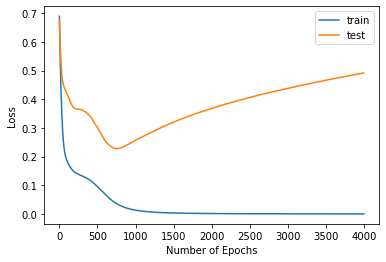

In [4]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()

# Overfit MLP With Early Stopping

In [ ]:
We can update the example and add very simple early stopping.

As soon as the loss of the model begins to increase on the test dataset, we will stop training.

First, we can define the early stopping callback.

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
We can then update the call to the fit() function and specify a list of callbacks via the “callback” argument.

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
The complete example with the addition of simple early stopping is listed below.

Epoch 00276: early stopping
Train: 0.967, Test: 0.843


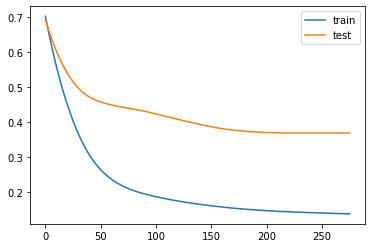

In [9]:

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 01068: early stopping
Train: 1.000, Test: 0.943


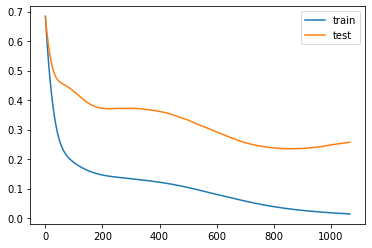

In [10]:

# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



In [17]:

# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.72857, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.72857

Epoch 00003: val_accuracy did not improve from 0.72857

Epoch 00004: val_accuracy did not improve from 0.72857

Epoch 00005: val_accuracy did not improve from 0.72857

Epoch 00006: val_accuracy did not improve from 0.72857

Epoch 00007: val_accuracy did not improve from 0.72857

Epoch 00008: val_accuracy did not improve from 0.72857

Epoch 00009: val_accuracy did not improve from 0.72857

Epoch 00010: val_accuracy did not improve from 0.72857

Epoch 00011: val_accuracy did not improve from 0.72857

Epoch 00012: val_accuracy did not improve from 0.72857

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy did not improve from 0.72857

Epoch 00015: val_accuracy did not improve from 0.72857

Epoch 00016: val_accuracy did not improve from 0.72857

Epoch 00017: val_accuracy did not improve from 0.72857

Epoch 00018: va


Epoch 00148: val_accuracy did not improve from 0.82857

Epoch 00149: val_accuracy did not improve from 0.82857

Epoch 00150: val_accuracy did not improve from 0.82857

Epoch 00151: val_accuracy did not improve from 0.82857

Epoch 00152: val_accuracy did not improve from 0.82857

Epoch 00153: val_accuracy did not improve from 0.82857

Epoch 00154: val_accuracy did not improve from 0.82857

Epoch 00155: val_accuracy did not improve from 0.82857

Epoch 00156: val_accuracy did not improve from 0.82857

Epoch 00157: val_accuracy did not improve from 0.82857

Epoch 00158: val_accuracy did not improve from 0.82857

Epoch 00159: val_accuracy did not improve from 0.82857

Epoch 00160: val_accuracy did not improve from 0.82857

Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0.82857

Epoch 00163: val_accuracy did not improve from 0.82857

Epoch 00164: val_accuracy did not improve from 0.82857

Epoch 00165: val_accuracy did not improve from 


Epoch 00299: val_accuracy did not improve from 0.84286

Epoch 00300: val_accuracy did not improve from 0.84286

Epoch 00301: val_accuracy did not improve from 0.84286

Epoch 00302: val_accuracy did not improve from 0.84286

Epoch 00303: val_accuracy did not improve from 0.84286

Epoch 00304: val_accuracy did not improve from 0.84286

Epoch 00305: val_accuracy did not improve from 0.84286

Epoch 00306: val_accuracy did not improve from 0.84286

Epoch 00307: val_accuracy did not improve from 0.84286

Epoch 00308: val_accuracy did not improve from 0.84286

Epoch 00309: val_accuracy did not improve from 0.84286

Epoch 00310: val_accuracy did not improve from 0.84286

Epoch 00311: val_accuracy did not improve from 0.84286

Epoch 00312: val_accuracy did not improve from 0.84286

Epoch 00313: val_accuracy did not improve from 0.84286

Epoch 00314: val_accuracy did not improve from 0.84286

Epoch 00315: val_accuracy did not improve from 0.84286

Epoch 00316: val_accuracy did not improve from 


Epoch 00447: val_accuracy did not improve from 0.84286

Epoch 00448: val_accuracy did not improve from 0.84286

Epoch 00449: val_accuracy did not improve from 0.84286

Epoch 00450: val_accuracy did not improve from 0.84286

Epoch 00451: val_accuracy did not improve from 0.84286

Epoch 00452: val_accuracy did not improve from 0.84286

Epoch 00453: val_accuracy did not improve from 0.84286

Epoch 00454: val_accuracy did not improve from 0.84286

Epoch 00455: val_accuracy did not improve from 0.84286

Epoch 00456: val_accuracy did not improve from 0.84286

Epoch 00457: val_accuracy did not improve from 0.84286

Epoch 00458: val_accuracy did not improve from 0.84286

Epoch 00459: val_accuracy did not improve from 0.84286

Epoch 00460: val_accuracy did not improve from 0.84286

Epoch 00461: val_accuracy did not improve from 0.84286

Epoch 00462: val_accuracy did not improve from 0.84286

Epoch 00463: val_accuracy did not improve from 0.84286

Epoch 00464: val_accuracy did not improve from 


Epoch 00593: val_accuracy did not improve from 0.88571

Epoch 00594: val_accuracy did not improve from 0.88571

Epoch 00595: val_accuracy did not improve from 0.88571

Epoch 00596: val_accuracy did not improve from 0.88571

Epoch 00597: val_accuracy did not improve from 0.88571

Epoch 00598: val_accuracy did not improve from 0.88571

Epoch 00599: val_accuracy did not improve from 0.88571

Epoch 00600: val_accuracy did not improve from 0.88571

Epoch 00601: val_accuracy did not improve from 0.88571

Epoch 00602: val_accuracy did not improve from 0.88571

Epoch 00603: val_accuracy did not improve from 0.88571

Epoch 00604: val_accuracy did not improve from 0.88571

Epoch 00605: val_accuracy did not improve from 0.88571

Epoch 00606: val_accuracy did not improve from 0.88571

Epoch 00607: val_accuracy did not improve from 0.88571

Epoch 00608: val_accuracy did not improve from 0.88571

Epoch 00609: val_accuracy improved from 0.88571 to 0.90000, saving model to best_model.h5

Epoch 00610:


Epoch 00740: val_accuracy did not improve from 0.92857

Epoch 00741: val_accuracy did not improve from 0.92857

Epoch 00742: val_accuracy did not improve from 0.92857

Epoch 00743: val_accuracy did not improve from 0.92857

Epoch 00744: val_accuracy did not improve from 0.92857

Epoch 00745: val_accuracy did not improve from 0.92857

Epoch 00746: val_accuracy did not improve from 0.92857

Epoch 00747: val_accuracy did not improve from 0.92857

Epoch 00748: val_accuracy did not improve from 0.92857

Epoch 00749: val_accuracy did not improve from 0.92857

Epoch 00750: val_accuracy did not improve from 0.92857

Epoch 00751: val_accuracy did not improve from 0.92857

Epoch 00752: val_accuracy did not improve from 0.92857

Epoch 00753: val_accuracy did not improve from 0.92857

Epoch 00754: val_accuracy did not improve from 0.92857

Epoch 00755: val_accuracy did not improve from 0.92857

Epoch 00756: val_accuracy did not improve from 0.92857

Epoch 00757: val_accuracy did not improve from 


Epoch 00894: val_accuracy did not improve from 0.94286

Epoch 00895: val_accuracy did not improve from 0.94286

Epoch 00896: val_accuracy did not improve from 0.94286

Epoch 00897: val_accuracy did not improve from 0.94286

Epoch 00898: val_accuracy did not improve from 0.94286

Epoch 00899: val_accuracy did not improve from 0.94286

Epoch 00900: val_accuracy did not improve from 0.94286

Epoch 00901: val_accuracy did not improve from 0.94286

Epoch 00902: val_accuracy did not improve from 0.94286

Epoch 00903: val_accuracy did not improve from 0.94286

Epoch 00904: val_accuracy did not improve from 0.94286

Epoch 00905: val_accuracy did not improve from 0.94286

Epoch 00906: val_accuracy did not improve from 0.94286

Epoch 00907: val_accuracy did not improve from 0.94286

Epoch 00908: val_accuracy did not improve from 0.94286

Epoch 00909: val_accuracy did not improve from 0.94286

Epoch 00910: val_accuracy did not improve from 0.94286

Epoch 00911: val_accuracy did not improve from 


Epoch 01043: val_accuracy did not improve from 0.94286

Epoch 01044: val_accuracy did not improve from 0.94286
Epoch 01044: early stopping
Train: 1.000, Test: 0.943


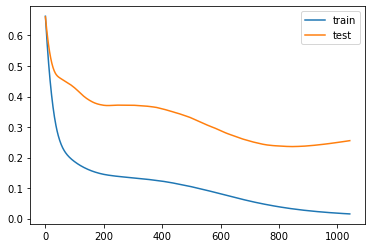

In [18]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Why not monitor validation accuracy for early stopping?

This is a good question. The main reason is that accuracy is a coarse measure of model performance during training and that loss provides more nuance when using early stopping with classification problems. The same measure may be used for early stopping and model checkpointing in the case of regression, such as mean squared error.